In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
sns.set_color_codes("deep")
sns.set_context("notebook")

# Hyperbolic trajectories in Hoyle–Lyttleton accretion

Polar form of hyperbola is 
$$
r(\theta) = \frac{p}{1 + e \cos\theta}
$$
where $p$ is the semi-latus rectum and $e$ is the eccentricity

In [112]:
def rhyperbola(theta, e, p):
    """
    Polar equation r(theta) for hyperbola

    with eccentricity e and semi-latus rectum p
    """
    return p / (1 + e * np.cos(theta))

def theta_max(e):
    """
    Asymptotic angle of hyperbola: 1 + e cos(theta) = 0 
    """
    return np.arccos(-1/e)
    
def xyhyperbola(e, p, rotate, N=200):
    """
    Coordinate points (x, y) for hyperbola
    """
    theta = np.linspace(-theta_max(e), theta_max(e), N, endpoint=False)
    theta += 0.5 * np.diff(theta)[0]
    r = rhyperbola(theta, e, p)
    x = r * np.cos(theta + rotate)
    y = r * np.sin(theta + rotate)
    return x, y

From the other notebook we have 
$$
p / r_0 = 2 b^2 / r_0^2
$$
where $b$ is the impact parameter and $r_0$ is the critical radius for accretion.

$h = (G M p)^{1/2} = v b$

From my dust wave paper I have 
$$
e = (1 + 4 b^2 / r_0^2)^{1/2}
$$
for which I cite Landau & Lifshitz (1976) *Classical Mechanics* section 14

The incoming direction corresponds to one asymptotic arm of the trajectory, so is at the asymptotic angle
$$
\theta_\infty = \cos^{-1} (-e^{-1})
$$
So, if we normalize all distances by $r_0$ then we now have all we need for the trajectories

In [113]:
def xytrajectory(b):
    """Hyperbolic trajectory in units of BHL radius

    As a function of impact parameter b
    """
    e = np.sqrt(1 + 4 * b ** 2)
    p = 2 * b ** 2
    angle = np.arccos(1/e)
    return xyhyperbola(e, p, angle)

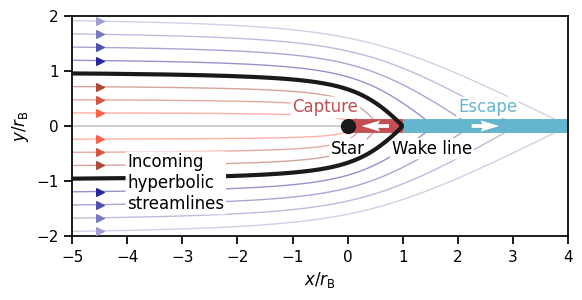

In [141]:
fig, ax = plt.subplots()

b_accrete = 0.25, 0.5, 0.75, 1.0
colors_accrete = sns.dark_palette("tomato", n_colors=len(b_accrete)+2, reverse=True)

b_escape = 1.0, 1.25, 1.5, 1.75, 2.0
colors_escape = sns.light_palette("darkblue", n_colors=len(b_escape)+2, reverse=True)

xmark = -4.5 # triangle markers position
for b, color in zip(b_escape, colors_escape):
    x, y = xytrajectory(b)
    m = y >= 0
    xx = np.concat((x[m][::-1], x[m]))
    yy = np.concat((y[m][::-1], -y[m]))
    ax.plot(xx, yy, color=color, lw=1, alpha=0.5)
    if b != 1.0:
        ymark = np.interp(xmark, xx[:50], yy[:50])
        ax.scatter(xmark, ymark, marker=">", color=color, s=30, zorder=100)
        ax.scatter(xmark, -ymark, marker=">", color=color, s=30, zorder=100)

for b, color in zip(b_accrete, colors_accrete):
    x, y = xytrajectory(b)
    m = y >= 0
    xx = np.concat((x[m][::-1], x[m]))
    yy = np.concat((y[m][::-1], -y[m]))
    ax.plot(xx, yy, color=color, lw=1, alpha=0.5)
    # ax.scatter(xx[10], yy[10], marker=">", color=color, s=30, zorder=100)
    if b != 1.0:
        ymark = np.interp(xmark, xx[:50], yy[:50])
        ax.scatter(xmark, ymark, marker=">", color=color, s=30, zorder=100)
        ax.scatter(xmark, -ymark, marker=">", color=color, s=30, zorder=100)

for b, color in [(1, "k")]:
    x, y = xytrajectory(b)
    m = y >= 0
    xx = np.concat((x[m][::-1], x[m]))
    yy = np.concat((y[m][::-1], -y[m]))
    ax.plot(xx, yy, color=color, lw=3, zorder=100, solid_joinstyle="miter")


ax.axhline(0, lw=0.3, c="k")
ax.plot([0, 1], [0, 0], lw=10, color="r", solid_capstyle="butt")
ax.quiver(0.5, 0, -1, 0, color="w", pivot="middle", zorder=100)

ax.plot([1, 100], [0, 0], lw=10, color="c",  solid_capstyle="butt")
ax.quiver(2.5, 0, 1, 0, color="w", pivot="middle", zorder=100)

ax.scatter(0, 0, marker="o", color="k", s=100, zorder=100)

whitebox = dict(facecolor="white", boxstyle="Round,pad=0.1", lw=0)

ax.text(-1, 0.25, "Capture", color="r", bbox=whitebox)
ax.text(2, 0.25, "Escape", color="c", bbox=whitebox)
ax.text(0.8, -0.5, "Wake line", bbox=whitebox)
ax.text(-0.3, -0.5, "Star", bbox=whitebox)
ax.text(
    -4, -1.5,
    "\n".join("Incoming hyperbolic streamlines".split()),
    bbox=whitebox,
    zorder=100,
)
ax.set(
    xlim=[-5, 4],
    ylim=[-2, 2],
    xlabel=r"$x / r_\mathrm{B}$",
    ylabel=r"$y / r_\mathrm{B}$",
)
ax.set_aspect("equal")
fig.savefig("hoyle-lyttleton-trajectories.pdf", bbox_inches="tight")
...;


In [51]:
np.rad2deg(np.arccos(1/np.sqrt(5)))

np.float64(63.43494882292201)